In [17]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0rQTPAU68JFnMxDfe4vF")
project = rf.workspace("monkey-rurpj").project("monkey-l6seo-toofk")
version = project.version(1)
dataset = version.download("yolov5")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Monkey-1 in yolov5pytorch:: 100%|██████████| 6772/6772 [00:03<00:00, 2054.92it/s]


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="C91nfURsR5h6eS3GYxB6")
project = rf.workspace("monkeyannotations").project("first-ioloa")
version = project.version(2)
dataset = version.download("yolov8")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to first-2 in yolov8:: 100%|██████████| 2022/2022 [00:00<00:00, 2447.20it/s]


In [1]:
import os
import shutil
import random

# Define paths
dataset_path = "D:/Dhilli/Monkey-2/train/images"   # Folder containing all images
labels_path = "D:/Dhilli/Monkey-2/train/labels"    # Folder containing all labels
output_dir = "D:/Dhilli/Monkey-2/split_data" # Output folder for splits

# Define split ratios
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1

# Create output directories
for split in ["train", "valid", "test"]:
    os.makedirs(os.path.join(output_dir, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, split, "labels"), exist_ok=True)

# Get all image files
image_files = sorted([f for f in os.listdir(dataset_path) if f.endswith(".jpg")])  # Adjust for other formats

# Shuffle images randomly
random.seed(42)  # Ensure reproducibility
random.shuffle(image_files)

# Split dataset
total_images = len(image_files)
train_split = int(total_images * train_ratio)
valid_split = int(total_images * (train_ratio + valid_ratio))

train_files = image_files[:train_split]
valid_files = image_files[train_split:valid_split]
test_files = image_files[valid_split:]

# Function to move files
def move_files(file_list, split):
    for file in file_list:
        image_src = os.path.join(dataset_path, file)
        label_src = os.path.join(labels_path, file.replace(".jpg", ".txt"))  # Assuming YOLO labels are .txt

        image_dst = os.path.join(output_dir, split, "images", file)
        label_dst = os.path.join(output_dir, split, "labels", file.replace(".jpg", ".txt"))

        shutil.copy(image_src, image_dst)
        shutil.copy(label_src, label_dst)

# Move files to respective directories
move_files(train_files, "train")
move_files(valid_files, "valid")
move_files(test_files, "test")

print("Dataset successfully split into Train, Validation, and Test sets! ✅")


Dataset successfully split into Train, Validation, and Test sets! ✅


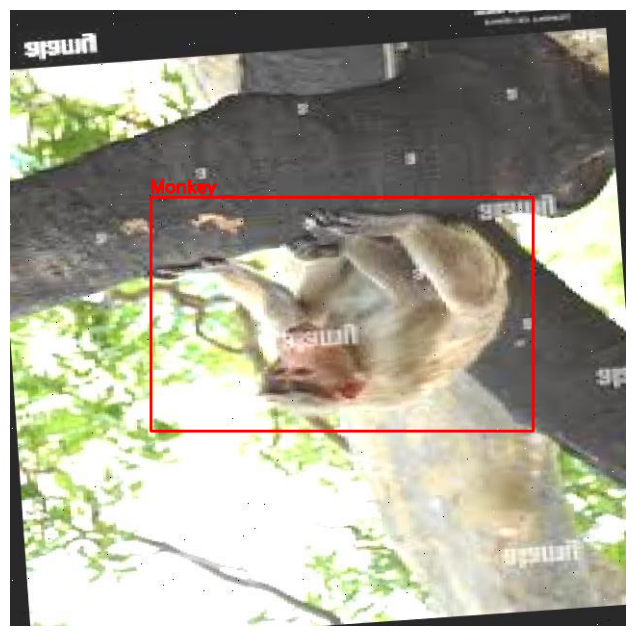

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset paths
dataset_path = "Monkey-2/split_data/train"  # Change to 'valid' or 'test' if needed
image_folder = os.path.join(dataset_path, "images")
label_folder = os.path.join(dataset_path, "labels")

# Get list of images
image_files = [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

# Load class names from data.yaml (Modify if needed)
class_names = ["Monkey"]  # Update with your class names from data.yaml

def plot_image_with_boxes(image_path, label_path):
    # Load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    h, w, _ = img.shape

    # Read YOLO label file
    with open(label_path, "r") as f:
        lines = f.readlines()

    # Draw bounding boxes
    for line in lines:
        data = line.strip().split()
        class_id = int(data[0])  # Class index
        x_center, y_center, width, height = map(float, data[1:])

        # Convert YOLO format to pixel values
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        # Draw rectangle and label
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        label = f"{class_names[class_id]}"
        cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Show image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Pick a random image to visualize
sample_image = image_files[90]
image_path = os.path.join(image_folder, sample_image)
label_path = os.path.join(label_folder, sample_image.replace(".jpg", ".txt").replace(".png", ".txt"))

# Plot the image with annotations
plot_image_with_boxes(image_path, label_path)

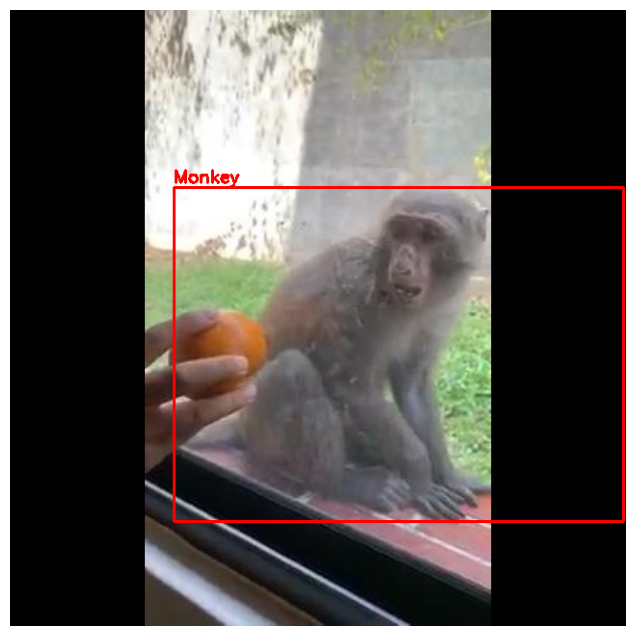

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset paths
dataset_path = "D:/Dhilli/Monkey-2/split_data/valid"  # Change to 'valid' or 'test' if needed
image_folder = os.path.join(dataset_path, "images")
label_folder = os.path.join(dataset_path, "labels")

# Get list of images
image_files = [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

# Load class names from data.yaml (Modify if needed)
class_names = ["Monkey"]  # Update with your class names from data.yaml

def plot_image_with_boxes(image_path, label_path):
    # Load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    h, w, _ = img.shape

    # Read YOLO label file
    with open(label_path, "r") as f:
        lines = f.readlines()

    # Draw bounding boxes
    for line in lines:
        data = line.strip().split()
        class_id = int(data[0])  # Class index
        x_center, y_center, width, height = map(float, data[1:])

        # Convert YOLO format to pixel values
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        # Draw rectangle and label
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        label = f"{class_names[class_id]}"
        cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Show image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Pick a random image to visualize
sample_image = image_files[30]
image_path = os.path.join(image_folder, sample_image)
label_path = os.path.join(label_folder, sample_image.replace(".jpg", ".txt").replace(".png", ".txt"))

# Plot the image with annotations
plot_image_with_boxes(image_path, label_path)

In [4]:
import cv2
import os
import glob

# Paths
image_folder = "Monkey-1/train/images"  # Change for test/valid
output_folder = "Monkey-1/train/images_resized"

os.makedirs(output_folder, exist_ok=True)

# Function to resize with padding
def resize_with_padding(image, target_size=640):
    h, w, c = image.shape
    scale = target_size / max(h, w)  # Keep aspect ratio
    new_w, new_h = int(w * scale), int(h * scale)
    
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    # Create a new blank image (black) and place the resized image in the center
    new_image = cv2.copyMakeBorder(resized,
                                   (target_size - new_h) // 2,
                                   (target_size - new_h + 1) // 2,
                                   (target_size - new_w) // 2,
                                   (target_size - new_w + 1) // 2,
                                   cv2.BORDER_CONSTANT,
                                   value=[0, 0, 0])
    return new_image
# Process all images
c = 0
for img_path in glob.glob(os.path.join(image_folder, "*")):
    c += 1
    img = cv2.imread(img_path)
    if img is None:
        continue
    
    resized_img = resize_with_padding(img, 640)
    
    output_path = os.path.join(output_folder, os.path.basename(img_path))
    cv2.imwrite(output_path, resized_img)
print("All images resized and saved successfully!", c)


All images resized and saved successfully! 3714


In [5]:
import cv2
import os
import glob

# Paths
image_folder = "Monkey-1/valid/images"  # Change for test/valid
output_folder = "Monkey-1/valid/images_resized"

os.makedirs(output_folder, exist_ok=True)

# Function to resize with padding
def resize_with_padding(image, target_size=640):
    h, w, c = image.shape
    scale = target_size / max(h, w)  # Keep aspect ratio
    new_w, new_h = int(w * scale), int(h * scale)
    
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    # Create a new blank image (black) and place the resized image in the center
    new_image = cv2.copyMakeBorder(resized,
                                   (target_size - new_h) // 2,
                                   (target_size - new_h + 1) // 2,
                                   (target_size - new_w) // 2,
                                   (target_size - new_w + 1) // 2,
                                   cv2.BORDER_CONSTANT,
                                   value=[0, 0, 0])
    return new_image
# Process all images
c = 0
for img_path in glob.glob(os.path.join(image_folder, "*")):
    c += 1
    img = cv2.imread(img_path)
    if img is None:
        continue
    
    resized_img = resize_with_padding(img, 640)
    
    output_path = os.path.join(output_folder, os.path.basename(img_path))
    cv2.imwrite(output_path, resized_img)
print("All images resized and saved successfully!", c)


All images resized and saved successfully! 763


In [6]:
import cv2
import os
import glob

# Paths
image_folder = "Monkey-1/test/images"  # Change for test/valid
output_folder = "Monkey-1/test/images_resized"

os.makedirs(output_folder, exist_ok=True)

# Function to resize with padding
def resize_with_padding(image, target_size=640):
    h, w, c = image.shape
    scale = target_size / max(h, w)  # Keep aspect ratio
    new_w, new_h = int(w * scale), int(h * scale)
    
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    # Create a new blank image (black) and place the resized image in the center
    new_image = cv2.copyMakeBorder(resized,
                                   (target_size - new_h) // 2,
                                   (target_size - new_h + 1) // 2,
                                   (target_size - new_w) // 2,
                                   (target_size - new_w + 1) // 2,
                                   cv2.BORDER_CONSTANT,
                                   value=[0, 0, 0])
    return new_image
# Process all images
c = 0
for img_path in glob.glob(os.path.join(image_folder, "*")):
    c += 1
    img = cv2.imread(img_path)
    if img is None:
        continue
    
    resized_img = resize_with_padding(img, 640)
    
    output_path = os.path.join(output_folder, os.path.basename(img_path))
    cv2.imwrite(output_path, resized_img)
print("All images resized and saved successfully!", c)


All images resized and saved successfully! 399


In [7]:
import os

image_folder = "Monkey-2/split_data/valid/images"
label_folder = "Monkey-2/split_data/valid/labels"

image_files = {f.split('.')[0] for f in os.listdir(image_folder)}
label_files = {f.split('.')[0] for f in os.listdir(label_folder)}


missing_labels = image_files - label_files
missing_images = label_files - image_files

print("❌ Images without labels:", missing_labels)
print("❌ Labels without images:", missing_images)


❌ Images without labels: set()
❌ Labels without images: set()


In [8]:
import os

train_path = "D:/Dhilli/Monkey-2/split_data/train/labels"
valid_path = "D:/Dhilli/Monkey-2/split_data/train/images"

print("Train images found:", os.path.exists(train_path))
print("Valid images found:", os.path.exists(valid_path))


Train images found: True
Valid images found: True


In [9]:
# image_files = [f for f in os.listdir(valid_path) if f.endswith((".jpg", ".png", ".jpeg"))]
image_files = [f for f in os.listdir(train_path) if f.endswith((".txt"))]

len(image_files)

9684

In [10]:
import os

label_dir = "D:/Dhilli/Monkey-2/split_data/test/images"
if not os.listdir(label_dir):
    print("🚨 ERROR: No label files found in", label_dir)
else:
    print("✅ Labels found:", len(os.listdir(label_dir)))


✅ Labels found: 439


In [11]:
import os

# Set paths
image_dir = "D:/Dhilli/Monkey-1/test/images_resized"  # Folder containing images
label_dir = "D:/Dhilli/Monkey-1/test/labels"  # Folder containing YOLO labels

# List all label files
empty_files = []

for label_file in os.listdir(label_dir):
    label_path = os.path.join(label_dir, label_file)
    
    # Check if label file is empty
    if os.path.isfile(label_path) and os.stat(label_path).st_size == 0:
        empty_files.append(label_path)

# Remove empty label files and their corresponding images
if empty_files:
    print(f"🚨 Found {len(empty_files)} empty label files! Removing them and their images...")

    for empty_label in empty_files:
        # Remove empty label file
        print(empty_label)
        os.remove(empty_label)

        # Get the corresponding image file name
        image_name = os.path.splitext(os.path.basename(empty_label))[0]
        
        # Check for image extensions (.jpg, .png, etc.)
        for ext in [".jpg", ".jpeg", ".png"]:
            image_path = os.path.join(image_dir, image_name + ext)
            if os.path.exists(image_path):
                print(image_path)
                os.remove(image_path)
                print(f"🗑️ Removed image: {image_path}")

    print("✅ Cleanup completed! All empty labels and corresponding images removed.")
else:
    print("✅ No empty label files found.")

🚨 Found 46 empty label files! Removing them and their images...
D:/Dhilli/Monkey-1/test/labels\-_-_mp4-0038_jpg.rf.8d353dcd7aca4f20f60105fb3f465c26.txt
D:/Dhilli/Monkey-1/test/images_resized\-_-_mp4-0038_jpg.rf.8d353dcd7aca4f20f60105fb3f465c26.jpg
🗑️ Removed image: D:/Dhilli/Monkey-1/test/images_resized\-_-_mp4-0038_jpg.rf.8d353dcd7aca4f20f60105fb3f465c26.jpg
D:/Dhilli/Monkey-1/test/labels\275246820_992211454722707_335931658453410443_n-Trim_mp4-0007_jpg.rf.79fb5d8c1bdc019e6afd342c0b8d2cf6.txt
D:/Dhilli/Monkey-1/test/images_resized\275246820_992211454722707_335931658453410443_n-Trim_mp4-0007_jpg.rf.79fb5d8c1bdc019e6afd342c0b8d2cf6.jpg
🗑️ Removed image: D:/Dhilli/Monkey-1/test/images_resized\275246820_992211454722707_335931658453410443_n-Trim_mp4-0007_jpg.rf.79fb5d8c1bdc019e6afd342c0b8d2cf6.jpg
D:/Dhilli/Monkey-1/test/labels\275246820_992211454722707_335931658453410443_n-Trim_mp4-0013_jpg.rf.ddd499c457ac0d195c0d6cbfc1607f96.txt
D:/Dhilli/Monkey-1/test/images_resized\275246820_99221145472

In [12]:
import os
import shutil

# Set paths
image_dir = "D:/Dhilli/Monkey-1/test/images_resized"  # Folder containing images
label_dir = "D:/Dhilli/Monkey-1/test/labels"  # Folder containing YOLO labels

empty_label_dir = "D:/Dhilli/Monkey-1/test/empty_labels"
empty_image_dir = "D:/Dhilli/Monkey-1/test/empty_images"

# Create directories if they don't exist
os.makedirs(empty_label_dir, exist_ok=True)
os.makedirs(empty_image_dir, exist_ok=True)

# List all empty label files
empty_files = []

for label_file in os.listdir(label_dir):
    label_path = os.path.join(label_dir, label_file)

    # Check if label file is empty
    if os.path.isfile(label_path) and os.stat(label_path).st_size == 0:
        empty_files.append(label_path)

# Move empty label files and their corresponding images
if empty_files:
    print(f"🚨 Found {len(empty_files)} empty label files! Moving them and their images...")

    for empty_label in empty_files:
        # Move empty label file
        shutil.move(empty_label, os.path.join(empty_label_dir, os.path.basename(empty_label)))
        print(f"📂 Moved label: {empty_label} ➡️ {empty_label_dir}")

        # Get the corresponding image file name
        image_name = os.path.splitext(os.path.basename(empty_label))[0]

        # Move images with possible extensions (.jpg, .png, etc.)
        for ext in [".jpg", ".jpeg", ".png"]:
            image_path = os.path.join(image_dir, image_name + ext)
            if os.path.exists(image_path):
                shutil.move(image_path, os.path.join(empty_image_dir, os.path.basename(image_path)))
                print(f"📂 Moved image: {image_path} ➡️ {empty_image_dir}")

    print("✅ Cleanup completed! All empty labels and corresponding images moved.")
else:
    print("✅ No empty label files found.")

✅ No empty label files found.


In [10]:
empty_labels = [f for f in os.listdir(label_dir) if os.stat(os.path.join(label_dir, f)).st_size == 0]
if empty_labels:
    print(f"🚨 Found {len(empty_labels)} empty label files. These images won't be used!")
else:
    print("✅ All labels contain bounding boxes.")


✅ All labels contain bounding boxes.


In [13]:
import sys
sys.path.append(r"D:\Dhilli\Monkey-1\train\labels")

In [14]:
# # from ultralytics import YOLO

# # model = YOLO("yolov5mu.pt")
# # data_path = "D:/Dhilli/Monkey-1/data.yaml"
# # model.train(data=data_path, epochs=1, imgsz=640)

# from ultralytics import YOLO

# # Load YOLO model
# model = YOLO('yolov8n.pt')  # Load a pretrained model

# # Check if dataset is loading correctly
# model.train(data='D:/Dhilli/Monkey-1/data.yaml', epochs=1, imgsz=640)


In [16]:
import yaml

data_yaml_path = "D:/Dhilli/Monkey-1/data.yaml"

# Load and print the dataset YAML file
with open(data_yaml_path, "r") as f:
    data = yaml.safe_load(f)

print(data)


{'names': ['Monkey'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'monkey-l6seo-toofk', 'url': 'https://universe.roboflow.com/monkey-rurpj/monkey-l6seo-toofk/dataset/1', 'version': 1, 'workspace': 'monkey-rurpj'}, 'train': 'D:/Dhilli/Monkey-1/train/images_resized', 'val': 'D:/Dhilli/Monkey-1/valid/images_resized', 'test': 'D:/Dhilli/Monkey-1/test/images_resized'}


In [ ]:
!yolo task=detect mode=train model=yolov5mu.pt data=D:/Dhilli/Monkey-1/data.yaml epochs=50 cache=False imgsz=640 batch=16 freeze=10

Ultralytics 8.3.83 🚀 Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
engine\trainer: task=detect, mode=train, model=yolov5mu.pt, data=D:/Dhilli/Monkey-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train43, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 


train: Scanning D:\Dhilli\Monkey-1\train\labels.cache... 2078 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2078/2078 [00:00<?, ?it/s]
train: Scanning D:\Dhilli\Monkey-1\train\labels.cache... 2078 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2078/2078 [00:00<?, ?it/s]
C:\Users\CSE RGUKT\AppData\Roaming\Python\Python310\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
C:\Users\CSE RGUKT\AppData\Roaming\Python\Python310\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
C:\Users\CSE RGUKT\AppD

In [58]:
!yolo task=detect mode=val model=runs/detect/train43/weights/best.pt data=D:/Dhilli/Monkey-1/data.yaml

Ultralytics 8.3.83 🚀 Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
YOLOv5m summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs
                   all        577        830      0.889      0.773      0.854      0.509
Speed: 0.5ms preprocess, 7.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\val
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning D:\Dhilli\Monkey-1\valid\labels.cache... 577 images, 0 backgrounds, 0 corrupt: 100%|██████████| 577/577 [00:00<?, ?it/s]
val: Scanning D:\Dhilli\Monkey-1\valid\labels.cache... 577 images, 0 backgrounds, 0 corrupt: 100%|██████████| 577/577 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/37 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/37 [00:00<00:34,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 2/37 [00:01<00:20,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 3/37 [00:01<00:15,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 4/37 [00:01<00:11,  2.76it/s]
                 Class     Images  Instances      B

In [59]:
!yolo task=detect mode=val model=runs/detect/train43/weights/best.pt data=D:/Dhilli/Monkey-1/data.yaml split=test


Ultralytics 8.3.83 🚀 Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
YOLOv5m summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs
val: New cache created: D:\Dhilli\Monkey-1\test\labels.cache
                   all        291        425      0.846      0.824      0.869      0.512
Speed: 0.7ms preprocess, 8.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs\detect\val2
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning D:\Dhilli\Monkey-1\test\labels...:   0%|          | 0/291 [00:00<?, ?it/s]
val: Scanning D:\Dhilli\Monkey-1\test\labels... 28 images, 0 backgrounds, 0 corrupt:  10%|▉         | 28/291 [00:00<00:01, 254.86it/s]
val: Scanning D:\Dhilli\Monkey-1\test\labels... 99 images, 0 backgrounds, 0 corrupt:  34%|███▍      | 99/291 [00:00<00:00, 511.75it/s]
val: Scanning D:\Dhilli\Monkey-1\test\labels... 165 images, 0 backgrounds, 0 corrupt:  57%|█████▋    | 165/291 [00:00<00:00, 567.48it/s]
val: Scanning D:\Dhilli\Monkey-1\test\labels... 228 images, 0 backgrounds, 0 corrupt:  78%|███████▊  | 228/291 [00:00<00:00, 587.49it/s]
val: Scanning D:\Dhilli\Monkey-1\test\labels... 288 images, 0 backgrounds, 0 corrupt:  99%|█████████▉| 288/291 [00:00<00:00, 589.04it/s]
val: Scanning D:\Dhilli\Monkey-1\test\labels... 291 images, 0 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<00:00, 560.36it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train43/weights/best.pt source="C:\Users\CSE RGUKT\Downloads\monkey 🐒🐒 circus performance.mp4" save=True


Ultralytics 8.3.83 🚀 Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
YOLOv5m summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs

image 1/1 C:\Users\CSE RGUKT\Desktop\Monkey\14.jpg: 416x640 8 Monkeys, 69.0ms
Speed: 4.6ms preprocess, 69.0ms inference, 356.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [16]:
# Import YOLOv8
from ultralytics import YOLO  

# Load YOLOv8m (medium) model
model = YOLO("yolov8x.pt")  

# Train the model on your dataset
model.train(
    data="D:/Dhilli/Monkey-2/data.yaml",  # Path to your dataset YAML file
    epochs=200,      
    imgsz=640,              # Image size (keep 640 for good performance)
    batch=16,               # Batch size (adjust based on your GPU memory)
    device="cuda:0",        # Train on GPU (use "cpu" if no GPU)
    workers=4,              # Number of data loading workers
    name="yolov8_monkeys"    # Custom name for training runs
)


New https://pypi.org/project/ultralytics/8.3.85 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.83  Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=D:/Dhilli/Monkey-2/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=4, project=None, name=yolov8_monkeys, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=

train: Scanning D:\Dhilli\Monkey-2\split_data\train\labels... 3510 images, 699 backgrounds, 0 corrupt: 100%|██████████| 3510/3510 [00:05<00:00, 586.80it/s]


train: New cache created: D:\Dhilli\Monkey-2\split_data\train\labels.cache


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning D:\Dhilli\Monkey-2\split_data\valid\labels... 439 images, 80 backgrounds, 0 corrupt: 100%|██████████| 439/439 [00:00<00:00, 675.08it/s]

val: New cache created: D:\Dhilli\Monkey-2\split_data\valid\labels.cache


Plotting labels to runs\detect\yolov8_monkeys\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\yolov8_monkeys
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      12.1G       1.97      2.009      2.264         12        640: 100%|██████████| 220/220 [02:37<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.67it/s]

                   all        439        577      0.697      0.609      0.655      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      11.9G       1.65      1.511      1.859         22        640: 100%|██████████| 220/220 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        439        577      0.721      0.534      0.575      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      12.1G      1.752      1.656      1.891         13        640: 100%|██████████| 220/220 [02:32<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]

                   all        439        577      0.648      0.492      0.531      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      12.1G      1.898       1.87       2.06         18        640: 100%|██████████| 220/220 [02:29<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.54it/s]

                   all        439        577      0.469      0.437      0.417      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      12.1G      1.847      1.856      1.998         17        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.41it/s]

                   all        439        577      0.685      0.568      0.607       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      12.1G      1.809      1.762      1.968         22        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        439        577      0.524        0.4      0.396      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      12.1G      1.757      1.736       1.94         15        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577        0.7      0.568      0.625      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      12.1G      1.739      1.639      1.911         17        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        439        577      0.754      0.529      0.646      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      12.1G      1.693       1.59      1.879         12        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.753        0.6      0.685      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      12.1G      1.654      1.565      1.852         23        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.76it/s]

                   all        439        577      0.723      0.655      0.706      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      12.1G      1.652      1.534      1.829         11        640: 100%|██████████| 220/220 [02:29<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all        439        577      0.708      0.589      0.648      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      12.1G      1.606      1.439      1.805         11        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all        439        577      0.763      0.667      0.732      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      12.1G      1.579      1.423      1.773         10        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.808      0.701      0.763      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      12.1G      1.547      1.371       1.77         25        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.784      0.664      0.748      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      12.1G      1.533      1.325      1.747         14        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.842      0.692      0.779      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      12.1G      1.526      1.325      1.733          8        640: 100%|██████████| 220/220 [02:29<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.863      0.722      0.819       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      12.1G      1.507      1.269      1.726         17        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577       0.85      0.685      0.779      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      12.1G       1.48       1.27      1.713         10        640: 100%|██████████| 220/220 [02:29<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.826        0.7      0.796      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      12.1G      1.477      1.231      1.711         14        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        439        577      0.791      0.733      0.783      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      12.1G      1.455       1.22      1.689         17        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        439        577      0.854      0.728      0.831      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      12.1G      1.422      1.174      1.658         14        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.829      0.747      0.817      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      12.1G      1.417      1.178      1.663         12        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.56it/s]

                   all        439        577      0.836      0.697      0.802      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      12.1G      1.395      1.136      1.645         14        640: 100%|██████████| 220/220 [02:28<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        439        577      0.867      0.744      0.841      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      12.1G        1.4       1.13      1.643         13        640: 100%|██████████| 220/220 [02:31<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        439        577      0.907      0.738      0.844       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      12.1G      1.373      1.104      1.621         15        640: 100%|██████████| 220/220 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        439        577      0.866      0.723      0.827      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      12.1G      1.357      1.096      1.634         20        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        439        577      0.881      0.744      0.836      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      12.1G      1.352      1.075      1.603         16        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.57it/s]

                   all        439        577      0.868      0.787      0.864      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      12.1G      1.342      1.044      1.587         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.44it/s]

                   all        439        577       0.87      0.745      0.847      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200        12G      1.334      1.058      1.579         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all        439        577      0.817       0.75      0.817      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      12.1G      1.322      1.028      1.579          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.852      0.778      0.843      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200        12G      1.297     0.9749      1.542         15        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.869       0.79      0.854      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200        12G       1.31      0.998      1.562         21        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]

                   all        439        577      0.865      0.797      0.868      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      12.1G       1.28     0.9693      1.543          7        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all        439        577      0.867      0.738      0.853      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      12.1G      1.286     0.9738      1.545         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all        439        577      0.871      0.793      0.864      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      12.1G      1.271      0.948      1.536         17        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        439        577      0.866      0.782      0.865      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      12.1G      1.238     0.9373      1.507         21        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all        439        577      0.879      0.821      0.889      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      12.1G      1.234     0.9178      1.513         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]

                   all        439        577      0.889       0.79      0.872      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      12.1G      1.245     0.9409      1.522         16        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]

                   all        439        577        0.9      0.806       0.88      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      12.1G      1.213     0.9054      1.489         19        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]

                   all        439        577      0.883      0.816      0.879      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      12.1G      1.192     0.8803      1.474          8        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        439        577       0.87      0.812      0.874      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      12.1G      1.212      0.881      1.493         15        640: 100%|██████████| 220/220 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        439        577      0.899      0.808      0.887      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      12.1G      1.188     0.8723      1.474         14        640: 100%|██████████| 220/220 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.43it/s]

                   all        439        577      0.898      0.808      0.884      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      12.1G      1.194     0.8753      1.477         17        640: 100%|██████████| 220/220 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        439        577      0.921      0.797      0.892      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      12.1G      1.189     0.8765       1.47         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.64it/s]

                   all        439        577      0.904      0.804      0.893      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      12.1G      1.159      0.849      1.444         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:14<00:00,  1.06s/it]

                   all        439        577       0.91      0.822      0.891      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      12.1G       1.15     0.8354      1.446         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.883      0.795      0.877      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      12.1G      1.171     0.8334      1.451         15        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.902      0.829      0.899      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      12.1G       1.15     0.8301      1.432          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.914      0.818       0.89      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      12.1G      1.124     0.8059      1.412         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        439        577      0.907      0.849      0.898       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      12.1G      1.125     0.7827      1.415         19        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        439        577       0.88      0.839      0.892      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200        12G      1.111     0.7946      1.412         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.911      0.832      0.892      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200        12G      1.104     0.7963      1.411         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.898      0.832        0.9       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200        12G      1.127     0.8183      1.423         21        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577       0.93      0.801      0.899      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      12.1G      1.114     0.7889      1.415         21        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.915      0.816      0.896       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      12.1G      1.088     0.7793       1.39         19        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.924      0.846      0.904      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      12.1G      1.091     0.7684      1.389         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        439        577      0.897      0.842      0.906      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      12.1G      1.078      0.747       1.39         13        640: 100%|██████████| 220/220 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.927       0.84      0.904      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      12.1G      1.074     0.7473      1.381         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577       0.95      0.799      0.904      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      12.1G       1.06     0.7423       1.37          7        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.906      0.835      0.898      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200        12G       1.06     0.7436      1.375          8        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577       0.92      0.833      0.904      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      12.1G      1.053     0.7355      1.378         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.932      0.837      0.905      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      12.1G      1.056     0.7388      1.369         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.914       0.85      0.915       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      12.1G      1.048     0.7285      1.355         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.918      0.837      0.908        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200        12G      1.029     0.7022      1.349         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.945      0.841      0.903      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      12.1G      1.037     0.7028      1.335         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.927      0.842      0.909      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      12.1G      1.018     0.6989      1.334          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.907      0.865      0.914      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      12.1G      1.012     0.6987      1.328         23        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577       0.91      0.855      0.907      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200        12G      1.005     0.6949      1.333         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.918      0.854      0.912      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      12.1G     0.9961     0.6782      1.322         18        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.929      0.868      0.911      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200        12G      1.017     0.6945      1.335          6        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.937      0.844       0.91      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200        12G     0.9889     0.6659      1.311         18        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.947      0.834      0.906      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      12.1G     0.9892     0.6697      1.307         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.935      0.841      0.898      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      12.1G     0.9737     0.6677      1.303         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.914      0.843      0.905        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      12.1G     0.9799     0.6651      1.307         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.949      0.834      0.912      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      12.1G     0.9689     0.6598      1.302          8        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.951      0.841       0.91      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200        12G       0.94     0.6458      1.288          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.922      0.858      0.914      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      12.1G     0.9642     0.6749      1.307         20        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.939      0.852      0.917       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200        12G     0.9396     0.6213       1.27         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.919      0.849      0.907      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      12.1G     0.9454     0.6442      1.284         22        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.921      0.844      0.908      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      12.1G     0.9327      0.635      1.273         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.942      0.863      0.918      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200        12G     0.9241     0.6212      1.264         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.938       0.86      0.921      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      12.1G     0.9384     0.6235      1.272         17        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577       0.92      0.846      0.909      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      12.1G     0.9253     0.6179      1.264         17        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.929      0.853      0.913       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      12.1G     0.9149     0.6227      1.258         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.944      0.865      0.926       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200        12G     0.9136     0.6226      1.251         23        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.934      0.867       0.93      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      12.1G     0.9033     0.6081      1.241         15        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.931      0.866      0.927      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      12.1G     0.9015     0.5992      1.238          6        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.936      0.836      0.913      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200        12G     0.9008     0.5939      1.246         16        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.935      0.847      0.921       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200        12G     0.8943     0.5888      1.245          7        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.929      0.851      0.915       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200        12G     0.9003     0.5985      1.244         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.937      0.844      0.919       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200        12G     0.8877     0.5917      1.235         22        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.926      0.868      0.922      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200        12G     0.8726     0.5724       1.22         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.946      0.854      0.926      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200        12G     0.8783     0.5871       1.23         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.939       0.87      0.928      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      12.1G     0.8616     0.5808      1.219         18        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577       0.95      0.865      0.925      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      12.1G     0.8569     0.5588      1.221         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.945      0.853       0.93      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200        12G     0.8674     0.5769      1.225          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.917      0.876      0.924      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      12.1G     0.8562     0.5616      1.219         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.921       0.87      0.924      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      12.1G     0.8512     0.5573      1.213         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.939      0.878      0.934      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      12.1G     0.8492       0.56       1.21         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577       0.93      0.872       0.93      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      12.1G     0.8481       0.56        1.2         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.928      0.846       0.92      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      12.1G     0.8396     0.5546      1.206         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577       0.91       0.88      0.927      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      12.1G     0.8263     0.5581        1.2         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.942      0.853      0.924      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      12.1G      0.837     0.5509      1.203         16        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.936      0.877      0.928      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      12.1G     0.8171     0.5463      1.184         15        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.935      0.869      0.927      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      12.1G      0.828      0.547      1.195          5        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.933      0.875      0.928      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200        12G     0.8071     0.5233      1.182         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.946      0.861      0.926      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200        12G     0.8084     0.5292       1.18         17        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.955      0.873      0.925      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200        12G     0.7872     0.5112      1.163         17        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.956      0.865      0.927      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      12.1G     0.8072     0.5315      1.171          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.935       0.87      0.928      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      12.1G     0.7961     0.5207      1.174         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.947      0.856       0.93      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      12.1G     0.7907     0.5292      1.172         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.947      0.869      0.932      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      12.1G     0.7942     0.5223      1.167         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.957      0.867      0.929      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      12.1G     0.7823     0.5139      1.159         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.942      0.865      0.933      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      12.1G     0.7926     0.5212      1.174         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.947       0.87      0.932      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      12.1G     0.7738      0.512      1.159         15        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.945      0.875       0.93      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      12.1G     0.7732     0.5026      1.161         17        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.939      0.882      0.927      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      12.1G     0.7639      0.498      1.152         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.935      0.879      0.929      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      12.1G     0.7576     0.4936      1.142         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.941      0.868      0.929      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      12.1G     0.7546     0.4868      1.139         21        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577       0.96      0.863      0.925      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      12.1G     0.7496     0.4958      1.142         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.943      0.867      0.929       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      12.1G     0.7477     0.4926      1.149         18        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577       0.96      0.865      0.932      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      12.1G     0.7503     0.4993      1.147         26        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.958      0.865      0.927      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200        12G     0.7495     0.4917       1.14          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.954      0.859      0.926       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      12.1G     0.7356     0.4799      1.132         15        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.944      0.867      0.925      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200        12G     0.7319      0.492      1.141         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.964      0.846      0.931      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200        12G     0.7242     0.4748      1.125         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577       0.95      0.858      0.933      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200        12G     0.7282     0.4677      1.135         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.937      0.868      0.931      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200        12G     0.7318     0.4703      1.128         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.956      0.851      0.931      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200        12G     0.7133      0.465      1.115         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.952      0.865      0.938      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200        12G     0.7232      0.474      1.132         22        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577       0.95      0.863      0.931      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      12.1G     0.7096     0.4596       1.12         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577       0.94      0.874      0.928      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      12.1G      0.703     0.4592      1.115         20        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.944       0.88      0.939      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      12.1G     0.7024     0.4541      1.118         18        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.954      0.868      0.933      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      12.1G     0.6933     0.4614      1.121         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.965      0.875      0.941      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      12.1G      0.694     0.4541      1.113         19        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577       0.96      0.879      0.941      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      12.1G     0.6962     0.4472      1.111         16        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.951      0.881      0.943       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      12.1G     0.6942     0.4498      1.103         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.947      0.872      0.936      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200        12G     0.6827     0.4452      1.101          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.915      0.894      0.938      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200        12G     0.6882     0.4438      1.103          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.915      0.881      0.931      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      12.1G     0.6869     0.4402      1.102          8        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.922      0.879      0.932      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      12.1G     0.6795     0.4454      1.103          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.946      0.873      0.935      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200        12G      0.665     0.4332      1.097         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.929      0.883       0.93      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200        12G     0.6607     0.4367      1.096         15        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.965      0.859      0.931      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      12.1G     0.6553     0.4283      1.096         18        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.956      0.861      0.931      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      12.1G     0.6546     0.4195      1.087         16        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577       0.94      0.865      0.934      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200        12G     0.6739     0.4338      1.093         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.947       0.86      0.929      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200        12G     0.6535     0.4272       1.09         23        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.947      0.869      0.933      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200        12G     0.6444     0.4202      1.084         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.932      0.877      0.936      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      12.1G     0.6489     0.4235      1.085          8        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.941      0.867      0.933      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      12.1G     0.6469      0.416      1.081         21        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.935      0.887      0.939      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      12.1G     0.6381     0.4213      1.081         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.958      0.873      0.938      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      12.1G     0.6377     0.4116      1.074         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.941      0.873      0.933      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200        12G     0.6316     0.4079      1.073         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.956      0.862      0.937      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200        12G     0.6304     0.4063      1.072         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.943      0.863      0.939      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200        12G     0.6167     0.4025      1.068         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.923      0.879      0.935      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      12.1G     0.6247       0.41      1.071         22        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577       0.92      0.879      0.934      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      12.1G     0.6138     0.3961      1.069         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.925      0.879      0.933      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      12.1G     0.6124     0.3974      1.063         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        439        577      0.954      0.855      0.934      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200        12G     0.6205     0.4051      1.076          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]

                   all        439        577      0.941      0.872      0.932      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      12.1G     0.6089     0.3956      1.062          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.947      0.868      0.932       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      12.1G      0.608     0.3941      1.058          7        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.947       0.86       0.93       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200        12G     0.6034     0.3917      1.058         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.927      0.875      0.928      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      12.1G     0.6069     0.3981      1.058         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.943      0.879      0.931       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      12.1G     0.5948     0.3881      1.046         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.939      0.873       0.93      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      12.1G     0.5905     0.3842      1.046         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.943      0.879      0.935       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      12.1G     0.5919     0.3867      1.046         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.944      0.879      0.934      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      12.1G     0.5871     0.3844      1.048         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.946      0.874      0.933      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200        12G     0.5819     0.3764      1.037         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.945      0.867      0.931      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      12.1G     0.5861     0.3821      1.047         15        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.954      0.867      0.936      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200        12G     0.5742     0.3766      1.035         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.949      0.873      0.933      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200        12G      0.566     0.3658      1.031         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.958      0.865      0.931      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      12.1G     0.5662     0.3695      1.036         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.965       0.86      0.932      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      12.1G     0.5707     0.3766       1.04         15        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.956      0.873      0.934      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      12.1G     0.5634     0.3654      1.035         18        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.951      0.873      0.933       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      12.1G      0.562     0.3624      1.031         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.953      0.873      0.933       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      12.1G     0.5506     0.3584      1.028         13        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.951      0.871      0.932      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      12.1G     0.5448     0.3574      1.023         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577       0.95       0.87      0.931      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      12.1G     0.5436     0.3554      1.021         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.953      0.872      0.931      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200        12G     0.5434     0.3564      1.024          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.949       0.87      0.932      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200        12G     0.5384     0.3515       1.02         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.966       0.85      0.931      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      12.1G     0.5433     0.3501      1.018         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.958      0.856      0.931      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      12.1G     0.5369     0.3544       1.02         20        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.954      0.863      0.933      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      12.1G     0.5298      0.344       1.02         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.948      0.863      0.933      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      12.1G     0.5264      0.342      1.007         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.949      0.868      0.932      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      12.1G     0.5369     0.3511      1.016         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.949      0.867      0.934      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      12.1G     0.5247     0.3427      1.013         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.949      0.869      0.933      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200        12G     0.5285     0.3534      1.014         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.944      0.872      0.932      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200        12G     0.5273     0.3493      1.015          5        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]

                   all        439        577      0.954      0.867      0.933       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      12.1G     0.5165      0.341      1.009         11        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.957      0.865      0.933      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      12.1G     0.5152     0.3388      1.004         10        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.963      0.863      0.933      0.691


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200        12G     0.4198     0.2234     0.9206          8        640: 100%|██████████| 220/220 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.947      0.874      0.931       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200        12G     0.4004     0.2115     0.9004          4        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        439        577      0.951      0.875       0.93      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      12.1G     0.3875     0.2061     0.8955          7        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]

                   all        439        577      0.958      0.868      0.929      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      12.1G      0.394     0.2103     0.9051          8        640: 100%|██████████| 220/220 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.955      0.867      0.924      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200        12G     0.3831     0.2044     0.8968          9        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.956      0.863      0.924      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200        12G     0.3762     0.1984     0.8917          4        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.949      0.863      0.925      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      12.1G     0.3791     0.2019     0.8935          6        640: 100%|██████████| 220/220 [02:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.959      0.858      0.927      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      12.1G     0.3705     0.1963     0.8939         12        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        439        577      0.949      0.871       0.93      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      12.1G     0.3742     0.1974      0.893         14        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]

                   all        439        577       0.95       0.87      0.929      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      12.1G     0.3666     0.1975     0.8885          4        640: 100%|██████████| 220/220 [02:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        439        577      0.947      0.875      0.929      0.687



200 epochs completed in 9.105 hours.
Optimizer stripped from runs\detect\yolov8_monkeys\weights\last.pt, 136.7MB
Optimizer stripped from runs\detect\yolov8_monkeys\weights\best.pt, 136.7MB

Validating runs\detect\yolov8_monkeys\weights\best.pt...
Ultralytics 8.3.83  Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]


                   all        439        577      0.956      0.873      0.934      0.693
Speed: 0.2ms preprocess, 12.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\yolov8_monkeys


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002179F5317B0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [18]:
!yolo task=detect mode=val model=runs/detect/yolov8_monkeys/weights/best.pt data=D:/Dhilli/Monkey-2/data.yaml

Ultralytics 8.3.83 🚀 Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs
                   all        439        577      0.956      0.873      0.934      0.693
Speed: 0.5ms preprocess, 19.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\val7
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning D:\Dhilli\Monkey-2\split_data\valid\labels.cache... 439 images, 80 backgrounds, 0 corrupt: 100%|██████████| 439/439 [00:00<?, ?it/s]
val: Scanning D:\Dhilli\Monkey-2\split_data\valid\labels.cache... 439 images, 80 backgrounds, 0 corrupt: 100%|██████████| 439/439 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/28 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   4%|▎         | 1/28 [00:00<00:24,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 2/28 [00:01<00:17,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 3/28 [00:01<00:15,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 4/28 [00:02<00:12,  1.94it/s]
                 Class     

In [19]:
!yolo task=detect mode=val model=runs/detect/yolov8_monkeys/weights/best.pt data=D:/Dhilli/Monkey-2/data.yaml split=test

Ultralytics 8.3.83 🚀 Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs
val: New cache created: D:\Dhilli\Monkey-2\split_data\test\labels.cache
                   all        439        651      0.942      0.871      0.929      0.691
Speed: 0.6ms preprocess, 20.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\val8
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning D:\Dhilli\Monkey-2\split_data\test\labels...:   0%|          | 0/439 [00:00<?, ?it/s]
val: Scanning D:\Dhilli\Monkey-2\split_data\test\labels... 28 images, 4 backgrounds, 0 corrupt:   6%|▋         | 28/439 [00:00<00:01, 273.91it/s]
val: Scanning D:\Dhilli\Monkey-2\split_data\test\labels... 86 images, 8 backgrounds, 0 corrupt:  20%|█▉        | 86/439 [00:00<00:00, 452.13it/s]
val: Scanning D:\Dhilli\Monkey-2\split_data\test\labels... 152 images, 19 backgrounds, 0 corrupt:  35%|███▍      | 152/439 [00:00<00:00, 545.78it/s]
val: Scanning D:\Dhilli\Monkey-2\split_data\test\labels... 211 images, 23 backgrounds, 0 corrupt:  48%|████▊     | 211/439 [00:00<00:00, 528.48it/s]
val: Scanning D:\Dhilli\Monkey-2\split_data\test\labels... 287 images, 48 backgrounds, 0 corrupt:  65%|██████▌   | 287/439 [00:00<00:00, 577.52it/s]
val: Scanning D:\Dhilli\Monkey-2\split_data\test\labels... 345 images, 50 backgrounds, 0 corrupt:  79%|███████▊  | 345/439 [00:00<00:00, 577.36it/s]
val: Scanni

In [29]:
!yolo task=detect mode=predict model=runs/detect/yolov8_monkeys/weights/best.pt source="C:\Users\CSE RGUKT\Desktop\Monkey\40.jpg" save=True

Ultralytics 8.3.83 🚀 Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs

image 1/1 C:\Users\CSE RGUKT\Desktop\Monkey\40.jpg: 640x640 1 Monkey, 22.3ms
Speed: 5.8ms preprocess, 22.3ms inference, 365.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict33
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0rQTPAU68JFnMxDfe4vF")
project = rf.workspace("monkey-rurpj").project("monkey-datasets")
version = project.version(1)
dataset = version.download("yolov8")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Monkey-Datasets-1 in yolov8:: 100%|██████████| 14088/14088 [00:07<00:00, 1964.32it/s]


In [8]:
# Import YOLOv8
from ultralytics import YOLO  

# Load YOLOv8m (medium) model
model = YOLO("yolov8x.pt")  

# Train the model on your dataset
model.train(
    data="D:/Dhilli/Monkey-2/data.yaml",  # Path to your dataset YAML file
    epochs=150,      
    imgsz=640,              # Image size (keep 640 for good performance)
    batch=16,               # Batch size (adjust based on your GPU memory)
    device="cuda:0",        # Train on GPU (use "cpu" if no GPU)
    workers=4,              # Number of data loading workers
    name="yolov8_monkeys_large"    # Custom name for training runs
)

New https://pypi.org/project/ultralytics/8.3.87 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.83  Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=D:/Dhilli/Monkey-2/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=4, project=None, name=yolov8_monkeys_large3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None

train: Scanning D:\Dhilli\Monkey-2\split_data\train\labels.cache... 9684 images, 699 backgrounds, 4741 corrupt: 100%|██████████| 9684/9684 [00:00<?, ?it/s]

train: WARNING  D:\Dhilli\Monkey-2\split_data\train\images\-1-_jpg.rf.2ba8ccbef33b581ad6960c46e6ac71ef.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\Dhilli\Monkey-2\split_data\train\images\-1-_jpg.rf.544f5d02e4fb956fdf5d831bd0b7114f.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\Dhilli\Monkey-2\split_data\train\images\-1-_jpg.rf.83048b423a8cc1b4e616a2c9f02f1ec5.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\Dhilli\Monkey-2\split_data\train\images\-1-_jpg.rf.f0ad2584175cdd8901f9085e10e33e43.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\Dhilli\Monkey-2\split_data\train\images\-2-_jpg.rf.b3610af0ad1130e3f4bdc38c4092515b.jpg: ignoring corrupt image/label: Label clas


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning D:\Dhilli\Monkey-2\split_data\valid\labels.cache... 1013 images, 80 backgrounds, 574 corrupt: 100%|██████████| 1013/1013 [00:00<?, ?it/s]

val: WARNING  D:\Dhilli\Monkey-2\split_data\valid\images\-3-_jpg.rf.b2634913218735575812a293fa742a97.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\Dhilli\Monkey-2\split_data\valid\images\-_-_mp4-0019_jpg.rf.f21b65404ad174ba9fc8dd2533f985d0.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\Dhilli\Monkey-2\split_data\valid\images\-_-_mp4-0028_jpg.rf.befbc144967eae2ac12c1fb4b7299371.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\Dhilli\Monkey-2\split_data\valid\images\-_-_mp4-0029_jpg.rf.72496eefcaa3db15da0f3142165389be.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\Dhilli\Monkey-2\split_data\valid\images\107_500_jpg.rf.f6bd13a9862827102634a5c7e182e50b.jpg: ignoring corrupt im

Plotting labels to runs\detect\yolov8_monkeys_large3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\yolov8_monkeys_large3
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      12.3G      1.701      1.631      1.989         34        640: 100%|██████████| 309/309 [03:49<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.45it/s]

                   all        439        577      0.719      0.568      0.655      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      11.8G      1.474      1.221      1.721         56        640: 100%|██████████| 309/309 [03:39<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        439        577      0.698      0.591      0.678      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      12.1G      1.556      1.359      1.785         48        640: 100%|██████████| 309/309 [03:32<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]

                   all        439        577      0.635      0.456      0.501      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      12.1G      1.676       1.56       1.88         32        640: 100%|██████████| 309/309 [03:31<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        439        577      0.556      0.485      0.482      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      11.8G       1.62      1.509      1.802         44        640:  10%|▉         | 30/309 [00:21<03:20,  1.39it/s]


KeyboardInterrupt: 

In [18]:
from roboflow import Roboflow
rf = Roboflow(api_key="0rQTPAU68JFnMxDfe4vF")
project = rf.workspace("monkey-rurpj").project("monkey-datasets")
version = project.version(2)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Monkey-Datasets-2 in yolov8:: 100%|██████████| 3004/3004 [00:01<00:00, 2546.95it/s]


In [1]:
# Import YOLOv8
from ultralytics import YOLO  

# Load YOLOv8m (medium) model
model = YOLO("yolov8x.pt")  

# Train the model on your dataset
model.train(
    data="D:/Dhilli/Monkey-1/data.yaml",  # Path to your dataset YAML file
    epochs=150,      
    imgsz=640,              # Image size (keep 640 for good performance)
    batch=16,               # Batch size (adjust based on your GPU memory)
    device="cuda:0",        # Train on GPU (use "cpu" if no GPU)
    workers=4,              # Number of data loading workers
    name="yolov8_monkeyssss_large"    # Custom name for training runs
)


New https://pypi.org/project/ultralytics/8.3.88 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.83  Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=D:/Dhilli/Monkey-1/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=4, project=None, name=yolov8_monkeyssss_large5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

train: Scanning D:\Dhilli\Monkey-1\train\labels.cache... 3714 images, 292 backgrounds, 0 corrupt: 100%|██████████| 3714/3714 [00:00<?, ?it/s]
C:\Users\CSE RGUKT\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


C:\Users\CSE RGUKT\AppData\Roaming\Python\Python310\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning D:\Dhilli\Monkey-1\valid\labels.cache... 763 images, 96 backgrounds, 0 corrupt: 100%|██████████| 763/763 [00:00<?, ?it/s]


Plotting labels to runs\detect\yolov8_monkeyssss_large5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\yolov8_monkeyssss_large5
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      12.3G      2.073       2.38      2.324          4        640: 100%|██████████| 233/233 [02:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.78it/s]

                   all        763        952    0.00286      0.247    0.00181   0.000487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      12.1G      2.152      2.458      2.399          4        640: 100%|██████████| 233/233 [02:42<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]


                   all        763        952    0.00501      0.345    0.00334   0.000974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      12.1G      2.073      2.391       2.28         11        640: 100%|██████████| 233/233 [02:40<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]

                   all        763        952      0.189      0.267      0.109     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      12.1G      1.971      2.243      2.212          5        640: 100%|██████████| 233/233 [02:39<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        763        952      0.316      0.202       0.16     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      12.4G      1.914       2.15      2.152          8        640: 100%|██████████| 233/233 [02:39<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.74it/s]

                   all        763        952      0.322      0.418      0.241     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      12.4G      1.848      2.014      2.077          6        640: 100%|██████████| 233/233 [02:39<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.81it/s]

                   all        763        952       0.43      0.397      0.347      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      12.4G      1.807      1.997       2.06          1        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.54it/s]

                   all        763        952      0.503      0.306      0.321      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      12.2G      1.767      1.904      2.031          4        640: 100%|██████████| 233/233 [02:38<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]

                   all        763        952      0.528      0.398      0.396      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      12.4G      1.747      1.845      2.012          4        640: 100%|██████████| 233/233 [02:38<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.39it/s]

                   all        763        952      0.568       0.45      0.446      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      12.4G      1.692      1.778      1.962          6        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.34it/s]

                   all        763        952      0.572      0.515      0.509       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      12.4G      1.678      1.727      1.945          9        640: 100%|██████████| 233/233 [02:42<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.50it/s]

                   all        763        952      0.579      0.483      0.488      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      12.1G      1.637      1.696      1.931          5        640: 100%|██████████| 233/233 [02:42<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.71it/s]

                   all        763        952      0.579      0.383      0.426      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      12.4G      1.625      1.635      1.899          7        640: 100%|██████████| 233/233 [02:42<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:18<00:00,  1.30it/s]

                   all        763        952      0.632      0.486      0.514      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      12.4G      1.612        1.6      1.892         11        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        763        952      0.536      0.442      0.433      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      12.4G      1.574      1.559      1.866          8        640: 100%|██████████| 233/233 [02:38<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.60it/s]

                   all        763        952      0.581      0.405      0.469      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      12.2G      1.566      1.518      1.844          6        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        763        952      0.722      0.557      0.631      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      12.4G      1.553      1.487       1.84          6        640: 100%|██████████| 233/233 [02:42<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.51it/s]

                   all        763        952      0.649      0.524      0.561      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      12.4G      1.529      1.468      1.819          2        640: 100%|██████████| 233/233 [02:42<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.42it/s]

                   all        763        952      0.641       0.52      0.572      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      12.4G      1.526      1.447       1.82          7        640: 100%|██████████| 233/233 [02:42<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.53it/s]

                   all        763        952      0.564      0.543      0.568      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      12.1G      1.497      1.419      1.796          8        640: 100%|██████████| 233/233 [02:42<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.66it/s]

                   all        763        952      0.643      0.589      0.626      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      12.4G      1.487      1.384      1.791          4        640: 100%|██████████| 233/233 [02:42<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]

                   all        763        952      0.703       0.58      0.635      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      12.4G      1.465      1.366      1.771          5        640: 100%|██████████| 233/233 [02:42<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.66it/s]

                   all        763        952      0.641      0.588      0.628      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      12.4G      1.454      1.342      1.749          6        640: 100%|██████████| 233/233 [02:42<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]

                   all        763        952      0.681      0.588       0.63      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      12.1G      1.431        1.3      1.738          6        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.68it/s]

                   all        763        952      0.736      0.582      0.681      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      12.4G      1.441      1.311      1.743          4        640: 100%|██████████| 233/233 [02:40<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:18<00:00,  1.28it/s]

                   all        763        952       0.48      0.519      0.459      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      12.4G      1.419       1.28      1.716          3        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.72it/s]

                   all        763        952      0.666      0.634       0.67      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      12.4G      1.419      1.272      1.729          6        640: 100%|██████████| 233/233 [5:32:39<00:00, 85.66s/it]     
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.78it/s]

                   all        763        952      0.674      0.625      0.663       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      12.1G      1.415      1.265       1.72          2        640: 100%|██████████| 233/233 [02:39<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.763      0.607      0.694      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      12.4G       1.38      1.219      1.689          8        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.65it/s]

                   all        763        952      0.749      0.631      0.691      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      12.4G      1.365      1.205      1.679         10        640: 100%|██████████| 233/233 [02:43<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.60it/s]

                   all        763        952       0.66      0.653      0.696      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      12.4G      1.384      1.194      1.687          2        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.41it/s]

                   all        763        952      0.731      0.671      0.729      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      12.1G      1.367      1.172      1.676          6        640: 100%|██████████| 233/233 [02:39<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]

                   all        763        952        0.7       0.64      0.705      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      12.4G      1.343      1.143      1.654          4        640: 100%|██████████| 233/233 [02:40<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]

                   all        763        952      0.757      0.652      0.733      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      12.4G      1.333      1.121      1.644          9        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.78it/s]

                   all        763        952      0.764      0.686      0.746      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      12.4G      1.304      1.093      1.621          8        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]

                   all        763        952      0.799      0.647      0.745      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      12.1G      1.306      1.095      1.625          3        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.81it/s]

                   all        763        952      0.785      0.675      0.742      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      12.4G      1.286      1.088      1.612          8        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.81it/s]

                   all        763        952      0.743      0.669      0.733      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      12.4G      1.269       1.05      1.593          7        640: 100%|██████████| 233/233 [02:38<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]

                   all        763        952      0.796      0.652      0.738      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      12.4G      1.256      1.044      1.579          3        640: 100%|██████████| 233/233 [02:42<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.48it/s]

                   all        763        952      0.746      0.663      0.738        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      12.1G      1.261      1.014      1.575          5        640: 100%|██████████| 233/233 [02:42<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.79it/s]

                   all        763        952      0.761      0.684      0.751      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      12.4G      1.263      1.038      1.588          2        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]

                   all        763        952      0.778      0.708      0.761      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      12.4G       1.24      1.001      1.578          9        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        763        952      0.771      0.689      0.754      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      12.4G      1.237      1.013      1.577          4        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]

                   all        763        952      0.798      0.702      0.774      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      12.2G      1.238      1.008      1.564          6        640: 100%|██████████| 233/233 [02:42<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.71it/s]

                   all        763        952      0.822      0.689      0.773      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      12.4G      1.214     0.9684      1.542          8        640: 100%|██████████| 233/233 [02:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.55it/s]

                   all        763        952      0.796      0.703      0.765      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      12.4G      1.206     0.9585      1.544          8        640: 100%|██████████| 233/233 [02:46<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]

                   all        763        952      0.803      0.678      0.771      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      12.4G      1.207     0.9454      1.538         14        640: 100%|██████████| 233/233 [02:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.54it/s]

                   all        763        952      0.812      0.704      0.785      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      12.1G      1.209     0.9681      1.536          6        640: 100%|██████████| 233/233 [02:46<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]

                   all        763        952      0.776      0.713      0.786      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      12.4G      1.181     0.9275      1.519          8        640: 100%|██████████| 233/233 [02:47<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.36it/s]

                   all        763        952      0.824      0.685       0.78      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      12.4G      1.152     0.9088      1.499          9        640: 100%|██████████| 233/233 [02:46<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.66it/s]

                   all        763        952      0.807      0.723      0.788      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      12.4G      1.162     0.9102      1.502          9        640: 100%|██████████| 233/233 [02:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]

                   all        763        952      0.836       0.71      0.789      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      12.1G      1.151     0.8927      1.488          3        640: 100%|██████████| 233/233 [02:40<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.71it/s]

                   all        763        952      0.798      0.709      0.776      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      12.4G      1.134     0.8812      1.485          5        640: 100%|██████████| 233/233 [02:39<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.79it/s]

                   all        763        952      0.841      0.682      0.787      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      12.4G      1.128     0.8956      1.479         13        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]

                   all        763        952      0.788      0.705      0.781      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      12.4G      1.126     0.8706      1.481          3        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]

                   all        763        952      0.822      0.702      0.789      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      12.1G      1.121     0.8643      1.463         10        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.861      0.726      0.799      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      12.4G      1.105      0.865       1.46         10        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.79it/s]

                   all        763        952       0.84      0.707      0.794      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      12.4G      1.112     0.8612      1.466          6        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.65it/s]

                   all        763        952      0.798      0.728      0.785      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      12.4G      1.079     0.8354       1.44          2        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]

                   all        763        952      0.867        0.7        0.8      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      12.1G      1.092     0.8343       1.45          8        640: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        763        952      0.855      0.711      0.791      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      12.4G      1.081     0.8241      1.447          8        640: 100%|██████████| 233/233 [02:42<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.67it/s]

                   all        763        952       0.86      0.735       0.81      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      12.4G       1.06     0.7925      1.416          7        640: 100%|██████████| 233/233 [02:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]

                   all        763        952      0.857      0.735      0.814      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      12.4G      1.062     0.7971       1.43          4        640: 100%|██████████| 233/233 [02:46<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]

                   all        763        952      0.843      0.731      0.815      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      12.1G      1.052      0.797      1.422          3        640: 100%|██████████| 233/233 [02:46<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]

                   all        763        952      0.833      0.735      0.807      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      12.4G      1.049     0.7805      1.407          7        640: 100%|██████████| 233/233 [02:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.46it/s]

                   all        763        952      0.857       0.72      0.809      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      12.4G      1.039     0.7795      1.414          4        640: 100%|██████████| 233/233 [02:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.72it/s]

                   all        763        952      0.851      0.749      0.819      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      12.3G      1.035     0.7869      1.416          3        640: 100%|██████████| 233/233 [02:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.72it/s]

                   all        763        952      0.812      0.768      0.822      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      12.1G      1.025      0.758      1.389          7        640: 100%|██████████| 233/233 [02:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        763        952      0.863      0.757      0.827      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      12.4G      1.009     0.7467      1.389          9        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.78it/s]

                   all        763        952      0.865      0.733      0.812      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      12.4G      1.017     0.7599      1.394          6        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.80it/s]

                   all        763        952      0.875      0.749      0.826      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      12.4G      1.002       0.75      1.387          6        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.81it/s]

                   all        763        952      0.861      0.745      0.822      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      12.1G     0.9978      0.746       1.38          2        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.867      0.746      0.821      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      12.4G     0.9792     0.7319      1.367         13        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]

                   all        763        952      0.854      0.761      0.838      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      12.4G      0.996     0.7381      1.375          4        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.861      0.758      0.826      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      12.4G     0.9673     0.7139      1.355          8        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.856      0.767      0.832      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      12.1G     0.9782     0.7266      1.367          6        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.856      0.756      0.829      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      12.4G     0.9538     0.7006      1.342          4        640: 100%|██████████| 233/233 [02:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.876      0.756      0.842      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      12.4G     0.9623     0.7037      1.348          7        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.884      0.771      0.839      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      12.4G     0.9404     0.6974      1.346          7        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.864       0.76      0.832      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      12.1G     0.9301     0.6906      1.326          5        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.868      0.735      0.826      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      12.4G     0.9279     0.6719      1.323          2        640: 100%|██████████| 233/233 [02:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.872       0.77      0.838      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      12.4G     0.9328     0.6872      1.325          8        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.871      0.788       0.84      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      12.4G     0.9038     0.6672      1.309          8        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.872       0.77      0.839      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      12.1G     0.9115     0.6542      1.307         16        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.851      0.779      0.835      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      12.4G     0.9094     0.6706      1.307          3        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.862      0.768      0.841       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      12.4G      0.894     0.6601      1.304         14        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.881      0.762      0.836      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      12.4G     0.9031     0.6622      1.301          5        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952       0.87      0.788      0.846      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      12.1G     0.8936     0.6463      1.285         11        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.863      0.775      0.837       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      12.4G     0.8807     0.6341      1.284          3        640: 100%|██████████| 233/233 [02:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.847      0.768      0.828       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      12.4G     0.8873     0.6396      1.287          5        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.873      0.746      0.833      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      12.4G     0.8821     0.6326      1.288          7        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.873       0.77      0.834      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      12.1G     0.8751     0.6399      1.287          2        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.899      0.754      0.836      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      12.4G     0.8671     0.6355      1.275          5        640: 100%|██████████| 233/233 [02:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952       0.87      0.775      0.841      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      12.4G     0.8776     0.6333      1.285          2        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952        0.9      0.749      0.826       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      12.4G     0.8569     0.6207      1.271          7        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.81it/s]

                   all        763        952      0.893      0.743      0.838      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      12.2G     0.8522     0.6034       1.26          6        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.876      0.759      0.843      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      12.4G     0.8328      0.598      1.252          3        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.875      0.773      0.843      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      12.4G     0.8556     0.6091      1.267         10        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.81it/s]

                   all        763        952      0.879      0.785      0.845       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      12.4G     0.8335     0.6025      1.252          7        640: 100%|██████████| 233/233 [02:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.889      0.782      0.846      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      12.1G     0.8132      0.585      1.238          6        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.876      0.769       0.84      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      12.4G     0.8109     0.5743      1.233          4        640: 100%|██████████| 233/233 [02:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.81it/s]

                   all        763        952      0.872      0.774      0.836      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      12.4G     0.8028     0.5745      1.232          4        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.888      0.753      0.832      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      12.4G     0.8115     0.5827      1.239          3        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952       0.87      0.775      0.842      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      12.1G     0.8131     0.5856      1.237          6        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.85it/s]

                   all        763        952      0.869      0.777      0.836      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      12.4G     0.7879     0.5699      1.217         10        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.894       0.75      0.829      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      12.4G      0.797     0.5619       1.23          7        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.884      0.767      0.835      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      12.4G     0.7855     0.5635      1.221          5        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.881       0.77      0.839       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      12.1G     0.7757     0.5567      1.215          9        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.887      0.768       0.84      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      12.4G     0.7835     0.5574      1.216          8        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.881      0.787      0.844      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      12.4G     0.7764     0.5699      1.214          5        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.878      0.784      0.841      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      12.4G     0.7596     0.5395      1.197          9        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.888      0.775      0.852      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      12.1G      0.755     0.5444      1.196          3        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.899      0.767      0.847      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      12.4G      0.763     0.5405      1.201          2        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.878      0.768      0.843      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      12.4G     0.7563     0.5443      1.199         11        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.881      0.767      0.843      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      12.4G     0.7488     0.5309      1.194          2        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.68it/s]

                   all        763        952      0.903      0.759      0.845      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      12.1G     0.7373     0.5289      1.177          7        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.902      0.777      0.845      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      12.4G     0.7393     0.5267       1.18          6        640: 100%|██████████| 233/233 [02:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.906      0.771      0.845      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      12.4G     0.7342     0.5225      1.184          9        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.871      0.787      0.833       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      12.4G     0.7308     0.5148      1.175          3        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.888      0.765      0.839      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      12.1G      0.726     0.5135      1.176          9        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.908      0.759      0.837      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      12.4G     0.7227     0.5092      1.167          4        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.856      0.777      0.839      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      12.4G      0.719     0.5039      1.168          4        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.85it/s]

                   all        763        952      0.888      0.765      0.843      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      12.4G     0.7221     0.5051      1.172          5        640: 100%|██████████| 233/233 [02:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.872      0.773      0.839      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      12.1G     0.7083     0.5051      1.172          7        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.888      0.762      0.835      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      12.4G     0.7047     0.5006      1.159          4        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.85it/s]

                   all        763        952        0.9      0.755      0.841      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      12.4G     0.6934     0.4945      1.151          6        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.878      0.758      0.836      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      12.4G     0.6975     0.4935       1.16          4        640: 100%|██████████| 233/233 [02:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.889      0.769      0.841       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      12.2G      0.701     0.4933      1.158          4        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.85it/s]

                   all        763        952      0.886      0.771      0.844      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      12.4G     0.6781     0.4873      1.145          7        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.886      0.774      0.842       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      12.4G     0.6864     0.4846      1.148          8        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.884       0.78      0.843      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      12.4G     0.6748     0.4765      1.146          9        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.867      0.775      0.839      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      12.1G     0.6714     0.4785      1.138          8        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.869      0.787       0.84      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      12.4G     0.6698     0.4742      1.134          4        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952       0.88      0.773      0.841      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      12.4G     0.6718     0.4786      1.144          7        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.905      0.762      0.846      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      12.4G     0.6569     0.4611      1.127         10        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952       0.89      0.778      0.846      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      12.1G     0.6645     0.4696      1.131          6        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.885      0.778       0.84       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      12.4G     0.6558     0.4661      1.128          6        640: 100%|██████████| 233/233 [02:36<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.882      0.776      0.842      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      12.4G     0.6503     0.4633      1.129         10        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.887      0.776      0.836      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      12.4G     0.6603     0.4664      1.129          6        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.883      0.774      0.834      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      12.1G     0.6489     0.4654      1.128          7        640: 100%|██████████| 233/233 [02:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.85it/s]

                   all        763        952      0.894      0.769      0.836      0.526


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      12.4G     0.5584     0.3279      1.044          3        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.875      0.775       0.83      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      12.4G     0.5425     0.3167      1.035          3        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.83it/s]

                   all        763        952      0.895      0.768      0.838       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      12.4G     0.5295     0.3091      1.026          3        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.81it/s]

                   all        763        952      0.863      0.791      0.843      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      12.1G     0.5234     0.3029      1.023          5        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.85it/s]

                   all        763        952      0.895      0.762      0.843      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      12.4G     0.5151     0.2989      1.016          2        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.886      0.777      0.845      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      12.4G      0.512     0.2985      1.019          3        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        763        952      0.908      0.767      0.847      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      12.3G     0.5091      0.293       1.01          2        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]

                   all        763        952      0.899      0.776       0.85      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      12.2G     0.5079     0.3001      1.019          2        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.85it/s]

                   all        763        952      0.887      0.786      0.851      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      12.4G     0.4906     0.2879      1.002          3        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.85it/s]

                   all        763        952      0.901      0.789      0.851      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      12.4G     0.4894      0.287     0.9999          1        640: 100%|██████████| 233/233 [02:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]

                   all        763        952      0.906      0.777      0.847      0.537



150 epochs completed in 12.865 hours.
Optimizer stripped from runs\detect\yolov8_monkeyssss_large5\weights\last.pt, 136.7MB
Optimizer stripped from runs\detect\yolov8_monkeyssss_large5\weights\best.pt, 136.7MB

Validating runs\detect\yolov8_monkeyssss_large5\weights\best.pt...
Ultralytics 8.3.83  Python-3.10.0 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16376MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]


                   all        763        952      0.897      0.776      0.847      0.538
Speed: 0.2ms preprocess, 12.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\yolov8_monkeyssss_large5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001514D3CB310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480